# Description
Hello I'm ihsan.<br>
I continue to improve myself the data science and machine learning. This is my seventh notebook but It is my sixth notebook about Machine Learning. In this notebook, I made the data review and data visualization. At the same time my original purpose, It applies the Naive Bayes Classification model of the classification part from machine learning in this dataset.By the way, I applied some of the NBC of types too. I explained them in the training model part.  If you review this notebook and interpret it for my development, I will be so happy. I will be waiting for your comments.<br>

[For a detailed description of the dataset, please click here](https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset)

Other my notebook:
- [GPU Search](https://www.kaggle.com/code/ihsncnkz/gpu-search)
- [EDA And Linear Regression](https://www.kaggle.com/code/ihsncnkz/eda-and-linear-regression)
- [Regression Models](https://www.kaggle.com/code/ihsncnkz/regression-models)
- [Logistic Regression](https://www.kaggle.com/code/ihsncnkz/logistic-regression)
- [Classification With K-Nearest Neighbors(KNN)](https://www.kaggle.com/code/ihsncnkz/classification-with-k-nearest-neighbors-knn)
- [Classification With Support Vector Machine(SVM)](https://www.kaggle.com/code/ihsncnkz/classification-with-support-vector-machine-svm)

# Contents
- [Data Review](#1)
- [Data Visualization](#2)
- [Naive Bayes Classification](#3)
    - [Data preparing for Naive Bayes Classification](#dp1)
    - [Traning Model](#tm1)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gender-classification-dataset/gender_classification_v7.csv


# Data Review <a id = "1"></a>

In [2]:
# I read the dataset with the pandas library.
data = pd.read_csv("/kaggle/input/gender-classification-dataset/gender_classification_v7.csv")

In [3]:
data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [4]:
# information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [5]:
# Data of values(Max, min, std...)
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Data Correlation: Relationship between columns
data.corr()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
long_hair,1.000000,-0.006530,-0.017233,0.001216,0.014432,0.011287,-0.025794
forehead_width_cm,-0.006530,1.000000,0.088596,0.251648,0.257368,0.258564,0.251328
forehead_height_cm,-0.017233,0.088596,1.000000,0.211655,0.194120,0.205441,0.215292
nose_wide,0.001216,0.251648,0.211655,1.000000,0.565192,0.557615,0.569303
nose_long,0.014432,0.257368,0.194120,0.565192,1.000000,0.561229,0.559794
lips_thin,0.011287,0.258564,0.205441,0.557615,0.561229,1.000000,0.565312
distance_nose_to_lip_long,-0.025794,0.251328,0.215292,0.569303,0.559794,0.565312,1.000000


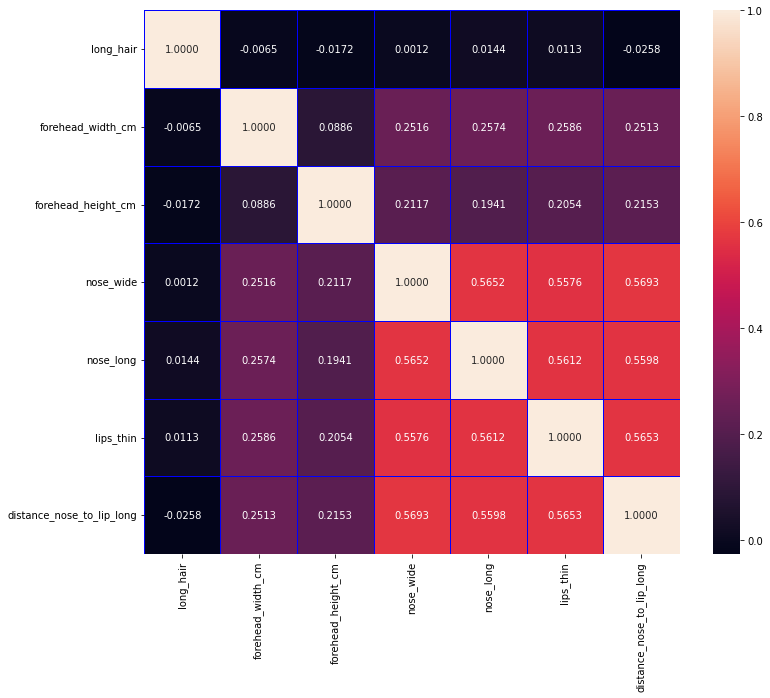

In [7]:
# Visualization of correlation result with seaborn library heatmap.
f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(data.corr(), annot = True, linewidths = 0.5, linecolor = "blue", fmt = ".4f", ax = ax)
plt.show()

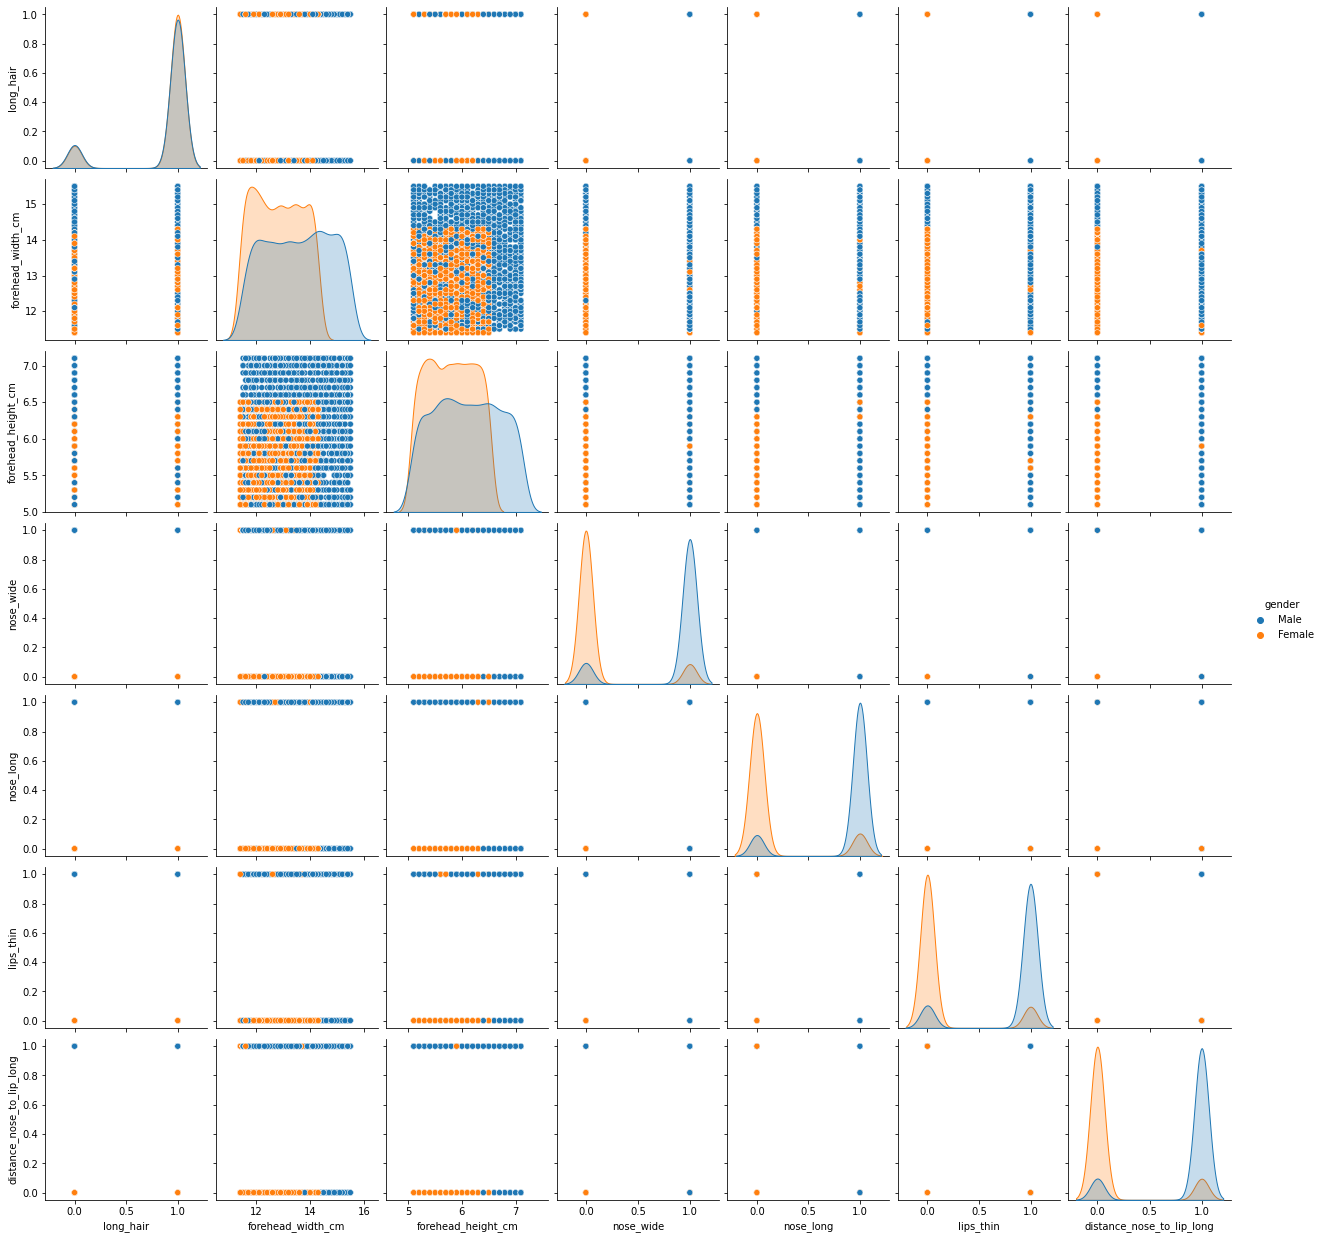

In [8]:
# Visualization of correlation results with seaborn library pairplot
sns.pairplot(data, hue = "gender")

In the code above, Most columns got zero and one of their values. Only forehead_width_cm and forehead_height_cm are different other columns.When I look at the graph I don't see a relationship between forehead_width_cm and forehead_height_cm because It seems very complex. 

In [9]:
# Columns of data
data.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

# Data Visualization <a id = "2"></a>

In this chapter, I made a visualization of data.

Female    2501
Male      2500
Name: gender, dtype: int64

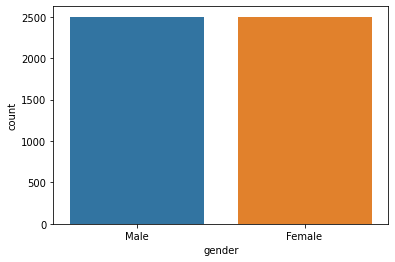

In [10]:
# The number of gender in the dataset and its graphic.
sns.countplot(x = "gender", data = data)
data.loc[:,"gender"].value_counts()

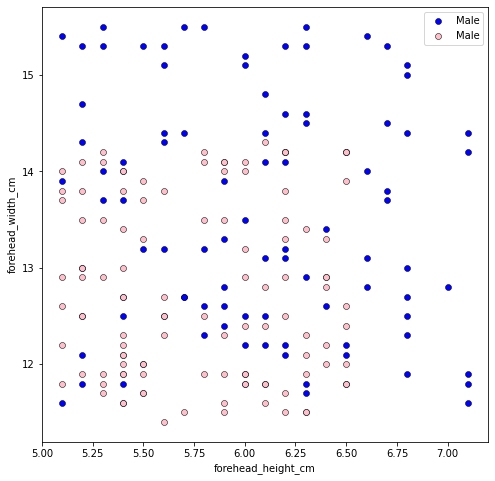

In [11]:
Male = data[data.gender == "Male"].iloc[:100,:]
Female = data[data.gender == "Female"].iloc[:100,:]

plt.figure(figsize = (8,8))
plt.scatter(Male.forehead_height_cm, Male.forehead_width_cm, color = "blue", label = "Male", linewidths = 0.5, edgecolor = "black")
plt.scatter(Female.forehead_height_cm, Female.forehead_width_cm, color = "pink", label = "Male", linewidths = 0.5, edgecolor = "black")
plt.xlabel("forehead_height_cm")
plt.ylabel("forehead_width_cm")
plt.legend()
plt.show()

In the code above, I took to only the top hundred values. Because When I took to all values It seemed very complex.

# Naive Bayes Classification <a id = "3"></a>

In this chapter, I will apply the Naive Bayes Classification model.

**What is the Naive Bayes Classification?**<br>

A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task. The crux of the classifier is based on the Bayes theorem.<br>

**Bayes Theorem:**<br>

![Bayes Theorem](https://miro.medium.com/max/1020/1*tjcmj9cDQ-rHXAtxCu5bRQ.png) <br>
Using Bayes theorem, we can find the probability of A happening, given that B has occurred. Here, B is the evidence and A is the hypothesis. The assumption made here is that the predictors/features are independent. That is presence of one particular feature does not affect the other. Hence it is called naive.<br>

**Types of Naive Bayes Classifier:**<br>

**Multinomial Naive Bayes:**<br>
This is mostly used for document classification problem, i.e whether a document belongs to the category of sports, politics, technology etc. The features/predictors used by the classifier are the frequency of the words present in the document.<br>

**Bernoulli Naive Bayes:**<br>
This is similar to the multinomial naive bayes but the predictors are boolean variables. The parameters that we use to predict the class variable take up only values yes or no, for example if a word occurs in the text or not.<br>

**Gaussian Naive Bayes:**<br>
When the predictors take up a continuous value and are not discrete, we assume that these values are sampled from a gaussian distribution.<br>

**Complement Naive Bayes**<br>
Another useful naïve Bayes model which was designed to correct the severe assumptions made by Multinomial Bayes classifier. This kind of NB classifier is suitable for imbalanced data sets.

## Data preparing for Naive Bayes Classification <a id = "dp1"></a>

I prepare x_data and y_data. I read dataset again beacause I will change in dataset. The class column is a string type and I want to that be an integer. In the block of code, I will specify.

In [12]:
# Read dataset
data_nbc = pd.read_csv("/kaggle/input/gender-classification-dataset/gender_classification_v7.csv")
data_nbc

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [13]:
# Change gender type
# Male : 1
# Female : 0
data_nbc.gender = [1 if i == "Male" else 0 for i in data_nbc.gender]

In [14]:
data_nbc

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


In [15]:
# x_data
x_data = data_nbc.drop(["gender"],axis = 1)

# y_data
y_data = data_nbc.gender.values

In [16]:
x_data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [17]:
y_data

array([1, 0, 1, ..., 0, 0, 1])

In [18]:
# Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state=1)

## Traning Model <a id = "tm1"></a>

In this chapter, I applied types of Naive Bayes Classifiers.

### Gaussian Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(x_train, y_train)

print("print Train for accuracy of NBC algo: ", gnb.score(x_train,y_train))
print("print Test for accuracy of NBC algo: ", gnb.score(x_test,y_test))

print Train for accuracy of NBC algo:  0.97
print Test for accuracy of NBC algo:  0.9713524317121919


### Multinomial Naive Bayes

In [20]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

mnb.fit(x_train, y_train)

print("print Train for accuracy of NBC algo: ", mnb.score(x_train,y_train))
print("print Test for accuracy of NBC algo: ", mnb.score(x_test,y_test))

print Train for accuracy of NBC algo:  0.9565714285714285
print Test for accuracy of NBC algo:  0.960692871419054


### Bernoulli Naive Bayes

In [21]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

bnb.fit(x_train, y_train)

print("print Train for accuracy of NBC algo: ", bnb.score(x_train,y_train))
print("print Test for accuracy of NBC algo: ", bnb.score(x_test,y_test))

print Train for accuracy of NBC algo:  0.9585714285714285
print Test for accuracy of NBC algo:  0.9640239840106596


### Complement Naive Bayes

In [22]:
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB()

cnb.fit(x_train, y_train)

print("print Train for accuracy of NBC algo: ", cnb.score(x_train,y_train))
print("print Test for accuracy of NBC algo: ", cnb.score(x_test,y_test))

print Train for accuracy of NBC algo:  0.9565714285714285
print Test for accuracy of NBC algo:  0.960692871419054


# CONCLUSION
I am learning the English language newly if I make an errata please advise me in the comment. Thank you for reading my notebook, your votes and your comments. I will be waiting for your advice.<br>

### references
In the Naive Bayes Classification chapter, I used the article for information. If you want to read the Article you can click
[here.](https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c#:~:text=A%20Naive%20Bayes%20classifier%20is,based%20on%20the%20Bayes%20theorem)